In [2]:
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('WDIData.csv')

In [3]:
# Step 1 - explore how countries are grouped and what indicators we have
# Write unique countries / indicators out to txt file for human review
def write_unique_list(df, col_name, outfile_name):
    out_list = df[col_name].unique().tolist()
    with open(outfile_name, 'w') as outfile:
        json.dump(out_list, outfile, indent=2)
    
write_unique_list(data, 'Country Name', 'country_names.txt')
write_unique_list(data, 'Indicator Name', 'indicator_names.txt')

In [4]:
# Step 2 - simplify and re-organize dataset 
# Start with geographic regions to simplify this excercise
geo_list = ['Arab World', 'Caribbean small states', 'East Asia & Pacific', 
            'Euro area', 'Europe & Central Asia', 'European Union', 
            'Latin America & Caribbean', 'Middle East & North Africa', 
            'North America', 'Pacific island small states', 'South Asia', 
           'Sub-Saharan Africa']

# There are a LOT of indicators to look at. I restricted these a bit at random, based on my own interest.
ind_list = ['2005 PPP conversion factor, GDP (LCU per international $)',
            'Population, female (% of total)', 
            'Ratio of female to male labor force participation rate (%) (national estimate)',
            'Adjusted net national income (constant 2010 US$)',
            'Employers, female (% of female employment) (modeled ILO estimate)',
            'Expenditure on primary education (% of government expenditure on education)',
            'Law mandates nondiscrimination based on gender in hiring (1=yes; 0=no)',
            'Literacy rate, adult female (% of females ages 15 and above)',
            'Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)',
            'Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care  (% of women age 15-49)',
            'Women who were first married by age 18 (% of women ages 20-24)',
            'Women\'s share of population ages 15+ living with HIV (%)'
           ]

#select regions and subset of indicators
less_data = data.loc[data['Country Name'].isin(geo_list) 
                     & data['Indicator Name'].isin(ind_list)].drop(['Country Code'], axis=1)
long_data = pd.melt(less_data, ['Country Name', 
                                'Indicator Code', 'Indicator Name'])
long_data = long_data.rename(index=str, columns={"variable": "year", 
                                                 "Indicator Name": "full_indicator_name",
                                                 "Indicator Code": "code",
                                                 "Country Name": "region"})

# Removal of rows where the year is listed as 'Unnamed: 62'
long_data = long_data[long_data.year != 'Unnamed: 62']

# Write out a preview of smaller data set for visual review
long_data.to_csv('data_preview.csv')

In [20]:
# Step 3 - Plot Party! 

# Make a facet grid to show changes in indicator over time by region
# Inputs: Variable Code and long-form variable name for title
def make_regional_facet_g(code,title):
    g = sns.FacetGrid(long_data[long_data['code'] == code],
                     col='region', hue='region', col_wrap=3)

    #add line, sub grid titles
    g.map(plt.plot, 'year', 'value').set_titles('{col_name} region')

    #title
    plt.subplots_adjust(top=0.92)
    g.fig.suptitle(title)

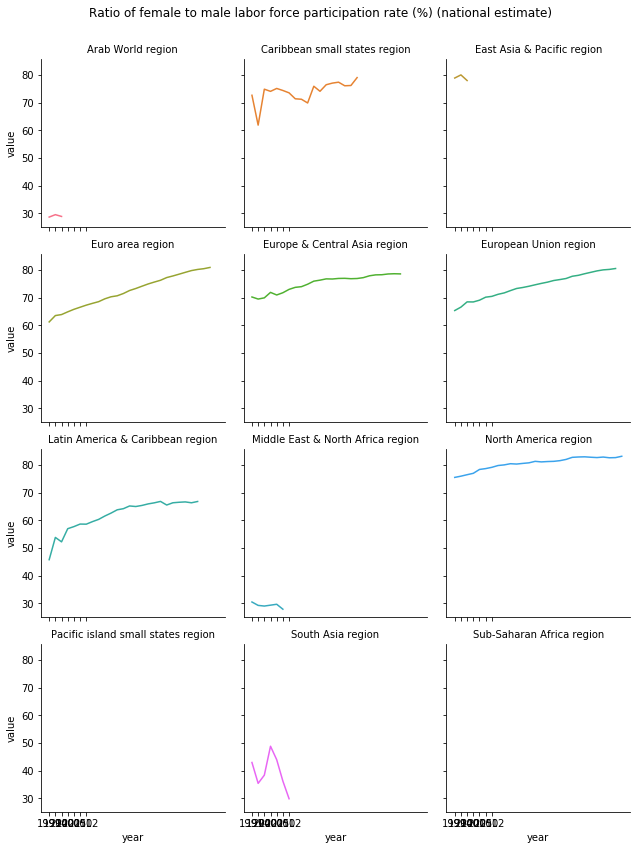

In [21]:
make_regional_facet_g('SL.TLF.CACT.FM.NE.ZS',
                      'Ratio of female to male labor force participation rate (%) (national estimate)')

Some regions are missing measurement for the ratio of female to male labor force participation. In other 
areas, some but not all years have been measured. 

In Latin America, the ratio has risen from about 45 percent to 68 percent between 1960 and 2017
(meaning women are participating in the labor force at a more equal percentage compared to men). 

In North American and European countries, the ratio started higher and has reached around 80 percent.

In the Carribean small states, growth has been unreliable, but increased by about 5 percent over the time 
measured.

In South Asia and in the Middle East, rates have fallen and then ceased to be measured.

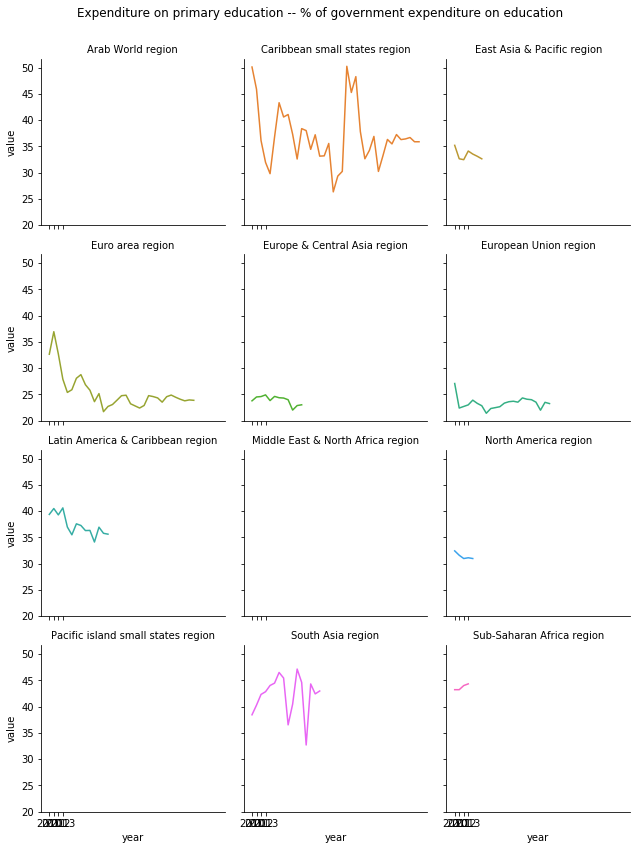

In [22]:
make_regional_facet_g('SE.XPD.PRIM.ZS',
                      'Expenditure on primary education -- % of government expenditure on education')

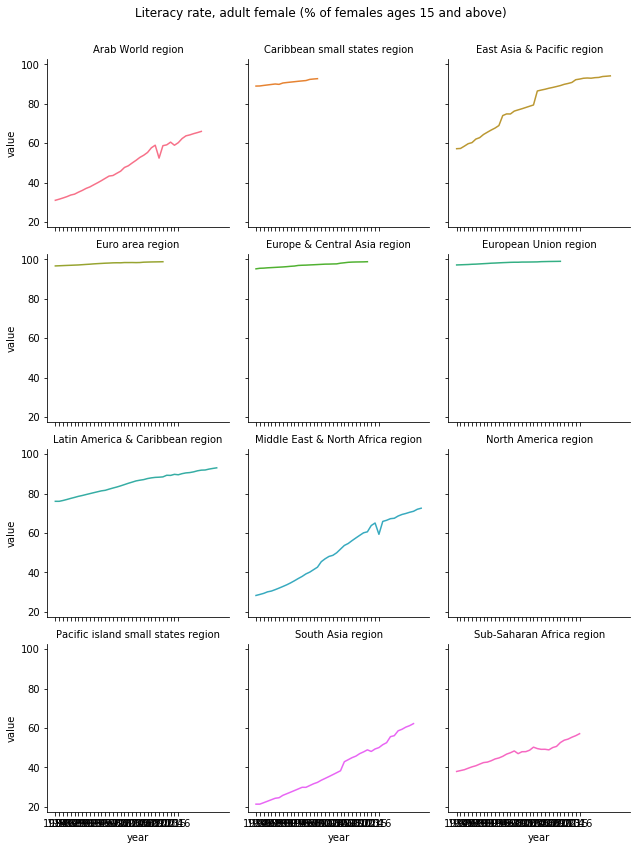

In [24]:
make_regional_facet_g('SE.ADT.LITR.FE.ZS',
                      'Literacy rate, adult female (% of females ages 15 and above)')

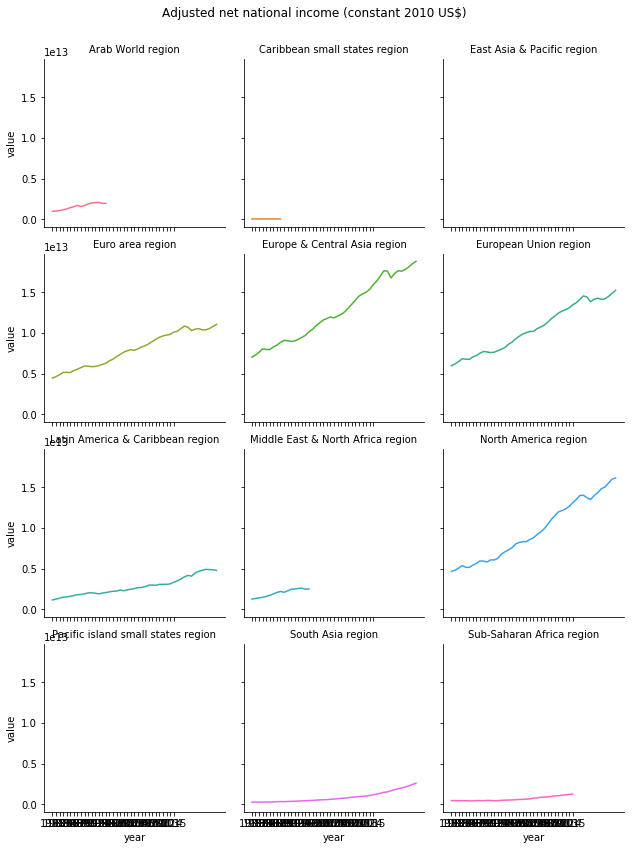

In [26]:
make_regional_facet_g('NY.ADJ.NNTY.KD',
                     'Adjusted net national income (constant 2010 US$)')